<a href="https://colab.research.google.com/github/Shohail786/19110188_Assignment2/blob/main/19110188_Assignment2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Reference: 
https://www.geeksforgeeks.org/ml-face-recognition-using-eigenfaces-pca-algorithm/

In [1]:
import numpy as np
import pandas as pd
from numpy import linalg as la
import cv2
import matplotlib.pyplot as plt
from matplotlib import *
import scipy
import scipy.stats
import os
from google.colab.patches import cv2_imshow
from PIL import Image
from google.colab.patches import cv2_imshow

In [2]:
size_img=250
h_img=400
w_img=400

In [3]:
path='/content/drive/MyDrive/faces'
flat_image=[]
train_image=[]
test_image=[]
def read_img(pic):
  img1 = cv2.imread(pic)
  crop = img1[50:600, 100:700]
  img = cv2.cvtColor(crop,cv2.COLOR_BGR2GRAY)
  #im=Image.open(r'{}'.format(pic))
  #im.show()
  (h,w) = img.shape[:2]
 
  width = size_img
  #ratio = width / float(w)
  #height = int(h * ratio)
  height=size_img
  
  #print(height,width,ratio)
  return cv2.resize(img,(width,height))
cnt=0
num_test_img=0
num_train_img=0
for file in os.listdir(path):
  img = read_img(path + '/' + file)
  # cv2_imshow(img)
  # cv2.waitKey(0)
  # cv2.destroyAllWindows() 
  img=np.asarray(img,dtype=float)/255.0
  #print(img.shape)
  if cnt%10!=0:
    train_image.append(img)
    num_train_img+=1
  else:
    test_image.append(img)
    num_test_img+=1
  cnt=cnt+1
print(len(train_image))
print(len(train_image[0]))
print(len(train_image[0][0]))

for i in range(len(train_image)):
    p=train_image[i].flatten()
    flat_image.append(p)
A_transpose = np.matrix(flat_image)
A = np.transpose(A_transpose)




405
250
250


In [4]:
#calculate the mean
m=np.mean(A,1)
#print the shape
print(m,m.shape)
A.shape

[[0.46668603]
 [0.47240862]
 [0.47271847]
 ...
 [0.49461147]
 [0.49421448]
 [0.49722585]] (62500, 1)


(62500, 405)

Mean Face


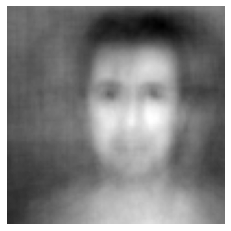

In [5]:
#reshape the mean
b= m.reshape(size_img,size_img)
#resize the mean
resz_mean = np.array(Image.fromarray(b).resize(size=(100, 100)))
plt.imshow(resz_mean,cmap=plt.cm.gray)
plt.axis('off')
print('Mean Face')
plt.show()

In [6]:
#calculate the x_i -mean
#put them in the matrix for all images
zero_mean =[]
col=0
#create a zero mean matrix to store the difference of A[:,col] - u
Zmean_matrix= np.ones((size_img**2,450))
for values in flat_image:
    zm= A[:,col] - m
    zm = np.squeeze(zm)
    Zmean_matrix[:,col] =zm
    zm_images = zm.resize(size_img,size_img)
    zero_mean.append(zm)
    col = col +1



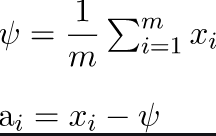


image.png

In [7]:
#calculate the eigen values and eigen vectors
s = (np.dot(np.transpose(Zmean_matrix),Zmean_matrix))/size_img
print(s.shape)
eigen_val, eigen_vec = la.eigh(s)
print(eigen_val.shape)

(450, 450)
(450,)


calculated Eigenvector and Eigenvalues of the reduced covariance matrix and then map them into the $C_{}'$ by using the formula $u_{i} = A\nu_{i}.$

In [8]:
uv =[]
for egv in eigen_vec:
  ev1=np.matrix(egv)
  egv_tp=np.transpose(ev1)
  u=np.dot(Zmean_matrix,egv_tp)
  nom=np.linalg.norm(u)  #normalize
  u=u/nom
  #reshape the u 
  u_new=u.reshape(size_img,size_img)
  uv.append(u_new)



select the K eigenvectors of $C_{}' $corresponding to the K largest eigenvalues (where K < M). These eigenvectors has size N2.

 We take the normalized training faces (face – average face)  x_{i} and represent each face vectors in the linear of combination of the best K eigenvectors (as shown in the diagram below).


In [9]:
num_img=num_train_img

In [11]:
buffer={}
def keigen(k):
#initialize the weight and k eigenvectors matrix
  wgts=np.zeros((num_img,k))
  uvk=np.zeros((size_img**2,k))
  column=0
  
  for i in range(k-1,-1,-1):
    uvk[:,column]=uv[i].flatten()
    column=column+1
  faces=[]
  for f in range(0,num_img):
    #calculate the weights for k largest eigenvalues
    wt=np.dot(np.transpose(uvk),Zmean_matrix[:,f])
    wgts[f,:]=wt
    af=np.dot(wt,np.transpose(uvk))
    #normalize the face
    af=af/float(np.max(af)-np.min(af))
    af=af+np.transpose(m)
    af_new=af.reshape(size_img,size_img)
    faces.append(af_new)
    buffer[k]=wgts
    
keigen(15)


In [12]:
def test(k,Zmean_test,threshold):
  uvx_test=np.zeros((size_img**2,k))
  col=0
  for i in range(k-1,-1,-1):
    uvx_test[:,col]=uv[i].flatten()
    col=col+1
  print("uvx",uvx_test.shape)
  print("zmean",Zmean_test.shape)
  wgt=np.dot(np.transpose(uvx_test),np.transpose(Zmean_test))
  
  wk=buffer[k]
  print(wk.shape)
  print(wgt.shape)
  error=[]
  for wv in wk:
    error.append(np.linalg.norm(wv-wgt.T))
  
  e_less=np.argmin(error)
  
  e_less_wt=wk[e_less]
  # plot the 
  fig,axes=plt.subplots(1,2)
  fig.set_size_inches(4,4)
  Zmean_test=Zmean_test+np.transpose(m)
  print("Zmean shape",Zmean_test.shape)
  Zmean_test=Zmean_test.reshape(size_img,size_img)
  img_plt=axes[0].imshow(Zmean_test,cmap=plt.cm.gray)
  axes[0].axis('off')
  axes[0].set(title='Test image')

  fc=np.dot(e_less_wt,np.transpose(uvx_test))
  print("fc_old",fc.shape)
  
  fc=fc+np.transpose(m)
  print("fc_new",fc.shape)
  fc_new=fc.reshape(size_img,size_img)
  print(fc_new)
  if np.min(error)<threshold:
    img_plt=axes[1].imshow(fc_new,cmap=plt.cm.gray)
  axes[1].axis('off')
  axes[1].set(title='face recognised')
  plt.show()
  

In [13]:

def model(k):
  print(len(test_image))
  for item in test_image:
    t_img=item.flatten()
    Zmean_test=t_img-np.transpose(m)
    print("zmean",Zmean_test.shape)
    test(k,Zmean_test,80)


45
zmean (1, 62500)
uvx (62500, 15)
zmean (1, 62500)
(405, 15)
(15, 1)
Zmean shape (1, 62500)
fc_old (62500,)
fc_new (1, 62500)
[[-0.11291067 -0.10140944 -0.06722432 ... -0.00211319 -0.02902382
   0.02315072]
 [-0.12566856 -0.1245998  -0.11776154 ... -0.02276434 -0.05484514
   0.01180202]
 [-0.12155742 -0.14692853 -0.09527283 ... -0.06456568 -0.0978208
  -0.05064786]
 ...
 [-0.14636939 -0.06859517 -0.1028981  ...  0.19963107  0.19856028
   0.14354969]
 [-0.18947354 -0.12080705 -0.14082636 ...  0.19586845  0.20147553
   0.20562765]
 [-0.20997472 -0.15999687 -0.14680046 ...  0.18384952  0.13792975
   0.20156617]]


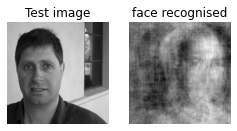

zmean (1, 62500)
uvx (62500, 15)
zmean (1, 62500)
(405, 15)
(15, 1)
Zmean shape (1, 62500)
fc_old (62500,)
fc_new (1, 62500)
[[0.94515029 0.95302909 0.92859662 ... 1.05431648 1.01676441 0.9619388 ]
 [0.98075262 0.99064387 0.9895653  ... 1.10040644 1.05657328 1.05190352]
 [0.98780147 0.98566502 1.0086429  ... 1.08677684 1.11394789 1.1641584 ]
 ...
 [0.7640884  0.73927442 0.76549419 ... 0.6927234  0.6971289  0.75938598]
 [0.77230849 0.72874635 0.86027163 ... 0.74344549 0.72988498 0.74313253]
 [0.76807985 0.79343807 0.80880304 ... 0.70668251 0.77172879 0.76463057]]


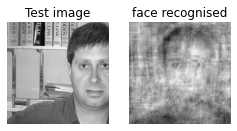

zmean (1, 62500)
uvx (62500, 15)
zmean (1, 62500)
(405, 15)
(15, 1)
Zmean shape (1, 62500)
fc_old (62500,)
fc_new (1, 62500)
[[ 0.27628241  0.26505865  0.30657264 ...  0.44492337  0.44136904
   0.57922566]
 [ 0.21004741  0.208784    0.19585333 ...  0.32066856  0.34492525
   0.51340115]
 [ 0.19957944  0.11613293  0.22288482 ...  0.32269891  0.32074157
   0.48035117]
 ...
 [ 0.07728682  0.08763422  0.05770657 ...  0.69385148  0.70672396
   0.6548062 ]
 [ 0.01919103 -0.00091571 -0.0070332  ...  0.71461343  0.70188199
   0.68778299]
 [-0.08281632 -0.05086844  0.01110931 ...  0.71207177  0.6455229
   0.69322262]]


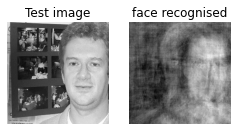

zmean (1, 62500)
uvx (62500, 15)
zmean (1, 62500)
(405, 15)
(15, 1)
Zmean shape (1, 62500)
fc_old (62500,)
fc_new (1, 62500)
[[0.97858393 0.95863835 0.90825335 ... 0.87290365 0.90680546 0.81903986]
 [0.95617093 0.94839354 0.96460164 ... 0.91549252 0.88946999 0.80958059]
 [0.91179555 0.99819949 0.92086385 ... 0.94466907 0.91679043 0.84917173]
 ...
 [0.96030001 0.92340961 0.95327048 ... 0.758948   0.74644714 0.82125599]
 [1.0374947  1.03132617 1.03086568 ... 0.76457371 0.74629346 0.7335648 ]
 [1.09432546 1.06415613 1.03870657 ... 0.7573489  0.80081855 0.73454535]]


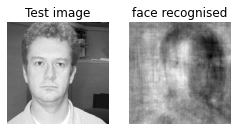

zmean (1, 62500)
uvx (62500, 15)
zmean (1, 62500)
(405, 15)
(15, 1)
Zmean shape (1, 62500)
fc_old (62500,)
fc_new (1, 62500)
[[0.89421419 0.88267799 0.8555839  ... 0.88192531 0.91096701 0.88043272]
 [0.85985128 0.85730525 0.86609816 ... 0.8625101  0.86472182 0.85327857]
 [0.83076075 0.86895295 0.84844741 ... 0.88454045 0.87752153 0.88297235]
 ...
 [0.81023273 0.76494182 0.7765861  ... 0.82619827 0.818614   0.85681399]
 [0.8457343  0.81007161 0.81484125 ... 0.84839878 0.82468195 0.80992938]
 [0.83829698 0.82575805 0.82881501 ... 0.84064889 0.84969953 0.81955749]]


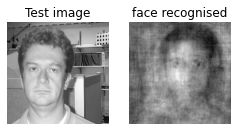

zmean (1, 62500)
uvx (62500, 15)
zmean (1, 62500)
(405, 15)
(15, 1)
Zmean shape (1, 62500)
fc_old (62500,)
fc_new (1, 62500)
[[0.4638264  0.45151879 0.48464582 ... 0.58768566 0.58036991 0.61506018]
 [0.45451899 0.44196718 0.43990627 ... 0.49764872 0.54023044 0.58717718]
 [0.50002028 0.42220611 0.4614422  ... 0.49415017 0.51878428 0.55452687]
 ...
 [0.29394258 0.2995875  0.28182665 ... 0.77155556 0.76436006 0.76611263]
 [0.26279183 0.25676368 0.29399739 ... 0.7767696  0.77171692 0.78306565]
 [0.2074919  0.23024724 0.2841819  ... 0.78284861 0.75437269 0.78136172]]


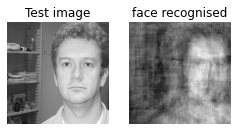

zmean (1, 62500)
uvx (62500, 15)
zmean (1, 62500)
(405, 15)
(15, 1)
Zmean shape (1, 62500)
fc_old (62500,)
fc_new (1, 62500)
[[1.58606553 1.56147565 1.53075973 ... 1.61616397 1.62082894 1.50768299]
 [1.62983081 1.61742322 1.61733407 ... 1.59165348 1.64725586 1.55485459]
 [1.68295249 1.65019645 1.60426113 ... 1.6494744  1.7367833  1.68953882]
 ...
 [1.33284786 1.22618606 1.27027998 ... 1.28386714 1.26994931 1.41893062]
 [1.37244359 1.28415126 1.43463839 ... 1.3135145  1.28972338 1.3201023 ]
 [1.37893379 1.35239046 1.3797001  ... 1.31113135 1.40467614 1.33276   ]]


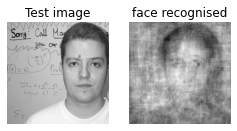

zmean (1, 62500)
uvx (62500, 15)
zmean (1, 62500)
(405, 15)
(15, 1)
Zmean shape (1, 62500)
fc_old (62500,)
fc_new (1, 62500)
[[-0.01326732  0.00750238  0.02419515 ...  0.06443224  0.06304254
   0.10399778]
 [-0.02309609 -0.00539001 -0.00727201 ...  0.07214193  0.06701117
   0.08020172]
 [-0.03724445 -0.01833439 -0.01931649 ...  0.0686824   0.04827641
   0.0266169 ]
 ...
 [-0.02925707  0.01204978 -0.00117564 ...  0.17243984  0.14745341
   0.1172554 ]
 [-0.04397091  0.01092476 -0.07070457 ...  0.14434131  0.13463383
   0.14399686]
 [-0.02276832 -0.02126225 -0.04851912 ...  0.14108347  0.09678682
   0.12993775]]


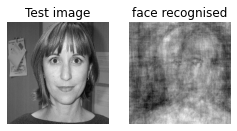

zmean (1, 62500)
uvx (62500, 15)
zmean (1, 62500)
(405, 15)
(15, 1)
Zmean shape (1, 62500)
fc_old (62500,)
fc_new (1, 62500)
[[-0.44517086 -0.40546151 -0.36935842 ... -0.34093343 -0.32537812
  -0.22352717]
 [-0.47768458 -0.45559128 -0.4524902  ... -0.36549946 -0.36674717
  -0.29967725]
 [-0.48958039 -0.47918695 -0.45000401 ... -0.38331609 -0.43740402
  -0.42545015]
 ...
 [-0.39876269 -0.34587074 -0.37917352 ...  0.00775587 -0.01456413
  -0.11110915]
 [-0.45304767 -0.37824878 -0.5365909  ... -0.02703425 -0.03576572
  -0.03689323]
 [-0.4627414  -0.45291594 -0.47997053 ... -0.02585738 -0.12705169
  -0.05853878]]


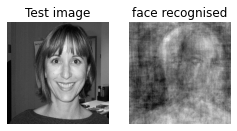

zmean (1, 62500)
uvx (62500, 15)
zmean (1, 62500)
(405, 15)
(15, 1)
Zmean shape (1, 62500)
fc_old (62500,)
fc_new (1, 62500)
[[0.84281652 0.83656676 0.84668779 ... 1.00351981 0.98745488 1.01095586]
 [0.84849281 0.84585663 0.83089502 ... 0.96091751 0.99423246 1.02166405]
 [0.88212871 0.82052626 0.852108   ... 0.97325865 1.01551988 1.06506047]
 ...
 [0.58688163 0.53586417 0.56519074 ... 0.90540908 0.89592989 0.93449481]
 [0.57562797 0.50602818 0.58508083 ... 0.9338505  0.91369434 0.92527387]
 [0.52850175 0.52431663 0.58631294 ... 0.93359314 0.93404961 0.93323631]]


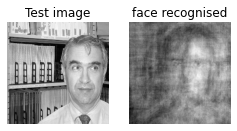

zmean (1, 62500)
uvx (62500, 15)
zmean (1, 62500)
(405, 15)
(15, 1)
Zmean shape (1, 62500)
fc_old (62500,)
fc_new (1, 62500)
[[1.1949788  1.19652552 1.1608214  ... 1.20030918 1.19977836 1.12737834]
 [1.21834027 1.22273318 1.23462315 ... 1.21121678 1.1989066  1.17335667]
 [1.22091425 1.23896439 1.22988719 ... 1.25081982 1.28007414 1.30287835]
 ...
 [1.07054168 1.00516819 1.03180247 ... 0.86308585 0.87127421 0.94738851]
 [1.0906681  1.04278379 1.14266842 ... 0.90212794 0.88275108 0.89262041]
 [1.09936538 1.1021334  1.09556696 ... 0.87757018 0.95324808 0.91300055]]


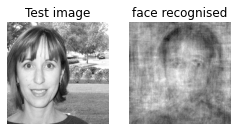

zmean (1, 62500)
uvx (62500, 15)
zmean (1, 62500)
(405, 15)
(15, 1)
Zmean shape (1, 62500)
fc_old (62500,)
fc_new (1, 62500)
[[1.36917215 1.35079262 1.32609481 ... 1.48691151 1.4881672  1.43061218]
 [1.38351794 1.38209708 1.36723679 ... 1.45298691 1.5001536  1.46723597]
 [1.41714177 1.38024149 1.37006845 ... 1.49404511 1.56384422 1.5729301 ]
 ...
 [1.08358559 0.989292   1.0371069  ... 1.22109684 1.20829582 1.31928641]
 [1.11370833 1.01081406 1.13966268 ... 1.26103298 1.23215619 1.24773848]
 [1.08465036 1.06454374 1.11347035 ... 1.25636636 1.31349106 1.26363957]]


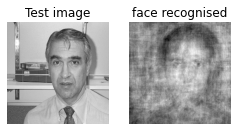

zmean (1, 62500)
uvx (62500, 15)
zmean (1, 62500)
(405, 15)
(15, 1)
Zmean shape (1, 62500)
fc_old (62500,)
fc_new (1, 62500)
[[0.19862107 0.20759529 0.23142851 ... 0.29447776 0.30905762 0.35848277]
 [0.18663535 0.19265762 0.18807833 ... 0.24912411 0.29025535 0.30594867]
 [0.20852794 0.18111159 0.1836301  ... 0.25900797 0.26692751 0.24733813]
 ...
 [0.10118199 0.0974324  0.09159111 ... 0.49477611 0.46705944 0.45959898]
 [0.07609051 0.09080395 0.03039541 ... 0.46922771 0.45791118 0.46820408]
 [0.06743675 0.05564042 0.06215621 ... 0.47909637 0.43395628 0.4501601 ]]


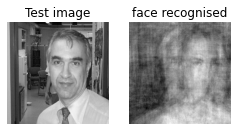

zmean (1, 62500)
uvx (62500, 15)
zmean (1, 62500)
(405, 15)
(15, 1)
Zmean shape (1, 62500)
fc_old (62500,)
fc_new (1, 62500)
[[1.5064253  1.50258745 1.43849426 ... 1.56134225 1.51259806 1.3605918 ]
 [1.57996342 1.58137295 1.58537883 ... 1.68388547 1.61098307 1.51452341]
 [1.59077049 1.62402415 1.59420818 ... 1.66948232 1.71416353 1.70742499]
 ...
 [1.2879521  1.22309749 1.29437594 ... 0.9013658  0.90197887 1.04819872]
 [1.3495998  1.2696157  1.49066781 ... 0.96968286 0.95611016 0.97343082]
 [1.39409335 1.40007855 1.41550794 ... 0.92367752 1.0656374  1.00132731]]


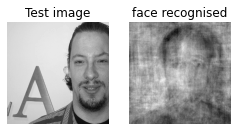

zmean (1, 62500)
uvx (62500, 15)
zmean (1, 62500)
(405, 15)
(15, 1)
Zmean shape (1, 62500)
fc_old (62500,)
fc_new (1, 62500)
[[-0.31919885 -0.28920886 -0.29489219 ... -0.44684767 -0.45955531
  -0.39051985]
 [-0.33362812 -0.32011097 -0.29667783 ... -0.31093813 -0.44323359
  -0.40901192]
 [-0.41052255 -0.31651354 -0.31628997 ... -0.38140635 -0.48763023
  -0.46870942]
 ...
 [-0.2184779  -0.15321145 -0.18324207 ... -0.3325239  -0.3306887
  -0.39687967]
 [-0.23896001 -0.14804207 -0.28075014 ... -0.355138   -0.33477535
  -0.3632625 ]
 [-0.15907985 -0.15185087 -0.21811544 ... -0.38945137 -0.41515137
  -0.38717503]]


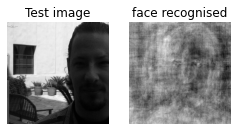

zmean (1, 62500)
uvx (62500, 15)
zmean (1, 62500)
(405, 15)
(15, 1)
Zmean shape (1, 62500)
fc_old (62500,)
fc_new (1, 62500)
[[ 0.22818606  0.25110027  0.21843022 ...  0.10315727  0.12568095
   0.09945066]
 [ 0.22796233  0.24634493  0.26998967 ...  0.23428905  0.14542169
   0.10361507]
 [ 0.1407533   0.25881689  0.21081629 ...  0.20026564  0.13683985
   0.07746553]
 ...
 [ 0.33278705  0.3663292   0.34389466 ...  0.02365494 -0.00050132
   0.00271944]
 [ 0.37399434  0.43793217  0.32269694 ...  0.00521511 -0.01327817
  -0.01638602]
 [ 0.47076174  0.45041109  0.33494594 ... -0.03626632 -0.03700349
  -0.03995984]]


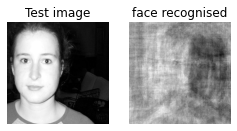

zmean (1, 62500)
uvx (62500, 15)
zmean (1, 62500)
(405, 15)
(15, 1)
Zmean shape (1, 62500)
fc_old (62500,)
fc_new (1, 62500)
[[0.68854326 0.70460015 0.69114233 ... 0.89839324 0.88131776 0.87195879]
 [0.67776513 0.69327207 0.68695166 ... 0.9032797  0.87271712 0.91400899]
 [0.65760995 0.6578897  0.71034295 ... 0.88798343 0.89257036 0.97794761]
 ...
 [0.53026798 0.51007452 0.53714731 ... 0.66902733 0.66461811 0.68380607]
 [0.5292977  0.48552089 0.55412527 ... 0.72628359 0.69068322 0.69425998]
 [0.48397104 0.51083368 0.53314671 ... 0.6943166  0.69699043 0.71809715]]


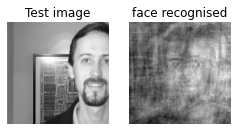

zmean (1, 62500)
uvx (62500, 15)
zmean (1, 62500)
(405, 15)
(15, 1)
Zmean shape (1, 62500)
fc_old (62500,)
fc_new (1, 62500)
[[ 0.27628241  0.26505865  0.30657264 ...  0.44492337  0.44136904
   0.57922566]
 [ 0.21004741  0.208784    0.19585333 ...  0.32066856  0.34492525
   0.51340115]
 [ 0.19957944  0.11613293  0.22288482 ...  0.32269891  0.32074157
   0.48035117]
 ...
 [ 0.07728682  0.08763422  0.05770657 ...  0.69385148  0.70672396
   0.6548062 ]
 [ 0.01919103 -0.00091571 -0.0070332  ...  0.71461343  0.70188199
   0.68778299]
 [-0.08281632 -0.05086844  0.01110931 ...  0.71207177  0.6455229
   0.69322262]]


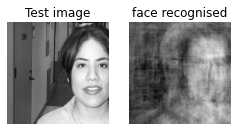

zmean (1, 62500)
uvx (62500, 15)
zmean (1, 62500)
(405, 15)
(15, 1)
Zmean shape (1, 62500)
fc_old (62500,)
fc_new (1, 62500)
[[2.25133651 2.22654341 2.14988586 ... 2.28533791 2.28722437 2.0927575 ]
 [2.32468029 2.32500992 2.31581036 ... 2.32974385 2.37124639 2.21250559]
 [2.35877103 2.36331415 2.28538212 ... 2.41008318 2.53949937 2.4684356 ]
 ...
 [1.91394799 1.7490018  1.83984046 ... 1.51117857 1.49004464 1.72182946]
 [2.00515831 1.85254545 2.08332755 ... 1.57097366 1.52458122 1.56221616]
 [2.04539057 1.99432249 2.00001935 ... 1.54655172 1.71280491 1.58860865]]


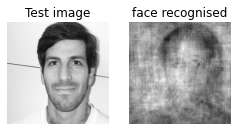

zmean (1, 62500)
uvx (62500, 15)
zmean (1, 62500)
(405, 15)
(15, 1)
Zmean shape (1, 62500)
fc_old (62500,)
fc_new (1, 62500)
[[1.17532691 1.16585503 1.12960926 ... 1.18647477 1.20369621 1.15139646]
 [1.16328213 1.16146927 1.17033648 ... 1.18982011 1.17706401 1.1629671 ]
 [1.13327169 1.1566979  1.15488518 ... 1.20992795 1.22942431 1.26160772]
 ...
 [1.02524119 0.95579758 0.97703262 ... 0.91849999 0.91634588 0.98605304]
 [1.05718611 0.99367913 1.05520414 ... 0.96624191 0.93209163 0.92616354]
 [1.05050077 1.04228671 1.03851274 ... 0.93872458 0.9813638  0.9429601 ]]


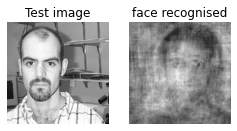

zmean (1, 62500)
uvx (62500, 15)
zmean (1, 62500)
(405, 15)
(15, 1)
Zmean shape (1, 62500)
fc_old (62500,)
fc_new (1, 62500)
[[0.32445889 0.3494639  0.34482786 ... 0.34052206 0.32156669 0.25267819]
 [0.39162834 0.40308431 0.41279119 ... 0.40736533 0.3987918  0.29708375]
 [0.44121243 0.46927429 0.40437841 ... 0.40917189 0.4195433  0.29659537]
 ...
 [0.31913867 0.339013   0.35477345 ... 0.25566635 0.22601805 0.26357759]
 [0.32627068 0.38256968 0.38824007 ... 0.22015459 0.22879031 0.26155057]
 [0.4064724  0.40173855 0.36928196 ... 0.21801259 0.25326394 0.2456265 ]]


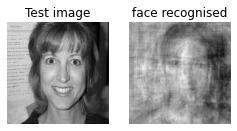

zmean (1, 62500)
uvx (62500, 15)
zmean (1, 62500)
(405, 15)
(15, 1)
Zmean shape (1, 62500)
fc_old (62500,)
fc_new (1, 62500)
[[0.32777272 0.33930454 0.31249871 ... 0.19682176 0.22773011 0.24902586]
 [0.27553243 0.28437658 0.3114664  ... 0.24763514 0.16687486 0.20556131]
 [0.17660783 0.28200153 0.2780236  ... 0.23297862 0.14723387 0.18645232]
 ...
 [0.42383316 0.44276355 0.41374658 ... 0.21937559 0.22621537 0.18031476]
 [0.44677786 0.48173617 0.3768641  ... 0.22980386 0.21366141 0.17893316]
 [0.47562983 0.47731927 0.4127884  ... 0.19803784 0.17152024 0.17844118]]


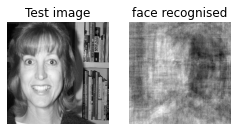

zmean (1, 62500)
uvx (62500, 15)
zmean (1, 62500)
(405, 15)
(15, 1)
Zmean shape (1, 62500)
fc_old (62500,)
fc_new (1, 62500)
[[0.6494766  0.65281074 0.63186263 ... 0.62705593 0.63285903 0.58185806]
 [0.66882432 0.67582337 0.67798885 ... 0.67306729 0.66962466 0.59496279]
 [0.67311237 0.70921616 0.65298927 ... 0.69535783 0.70363026 0.62874027]
 ...
 [0.57388276 0.55203013 0.57405506 ... 0.51219983 0.49056018 0.54691497]
 [0.60025053 0.60867362 0.60695521 ... 0.49912849 0.49108295 0.50203524]
 [0.65901196 0.6364619  0.61281127 ... 0.49393279 0.52746296 0.49406555]]


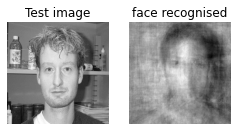

zmean (1, 62500)
uvx (62500, 15)
zmean (1, 62500)
(405, 15)
(15, 1)
Zmean shape (1, 62500)
fc_old (62500,)
fc_new (1, 62500)
[[0.84898087 0.84993311 0.83557549 ... 0.93625748 0.95323521 0.92094061]
 [0.84863283 0.84832799 0.84789464 ... 0.9012661  0.93824254 0.90149652]
 [0.88067628 0.8726893  0.85088083 ... 0.93142071 0.95858812 0.93556388]
 ...
 [0.69242423 0.62083978 0.6560424  ... 0.88947526 0.87082808 0.92882017]
 [0.69485322 0.64884423 0.6781126  ... 0.90327546 0.88531715 0.88862628]
 [0.68301195 0.66340262 0.69302088 ... 0.90916614 0.92643069 0.89268626]]


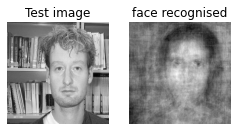

zmean (1, 62500)
uvx (62500, 15)
zmean (1, 62500)
(405, 15)
(15, 1)
Zmean shape (1, 62500)
fc_old (62500,)
fc_new (1, 62500)
[[1.54276283 1.54472193 1.50448201 ... 1.7035851  1.68700328 1.56929454]
 [1.59354994 1.60026635 1.59138707 ... 1.71098927 1.73587609 1.65747272]
 [1.63595662 1.61673248 1.60359081 ... 1.75837742 1.84717956 1.84310714]
 ...
 [1.2641676  1.15531215 1.22759638 ... 1.14802399 1.13618935 1.26693196]
 [1.29144151 1.18584885 1.36538311 ... 1.21111569 1.17236201 1.20005984]
 [1.28300647 1.27527782 1.3075707  ... 1.19011233 1.28495376 1.23151203]]


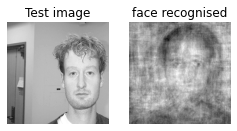

zmean (1, 62500)
uvx (62500, 15)
zmean (1, 62500)
(405, 15)
(15, 1)
Zmean shape (1, 62500)
fc_old (62500,)
fc_new (1, 62500)
[[0.75608163 0.74797878 0.73825307 ... 0.72840255 0.76004472 0.75505916]
 [0.74220902 0.74613809 0.7477775  ... 0.66448506 0.72184731 0.70416678]
 [0.76400599 0.76884734 0.72840513 ... 0.72289245 0.74687922 0.71049225]
 ...
 [0.65706131 0.6051396  0.60634206 ... 0.8156171  0.80264974 0.84493008]
 [0.66265057 0.64433918 0.62478258 ... 0.79492787 0.79293027 0.7910024 ]
 [0.66611546 0.63891723 0.64340245 ... 0.81156491 0.82766321 0.78600205]]


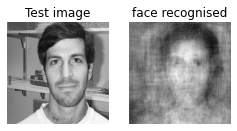

zmean (1, 62500)
uvx (62500, 15)
zmean (1, 62500)
(405, 15)
(15, 1)
Zmean shape (1, 62500)
fc_old (62500,)
fc_new (1, 62500)
[[-0.11291067 -0.10140944 -0.06722432 ... -0.00211319 -0.02902382
   0.02315072]
 [-0.12566856 -0.1245998  -0.11776154 ... -0.02276434 -0.05484514
   0.01180202]
 [-0.12155742 -0.14692853 -0.09527283 ... -0.06456568 -0.0978208
  -0.05064786]
 ...
 [-0.14636939 -0.06859517 -0.1028981  ...  0.19963107  0.19856028
   0.14354969]
 [-0.18947354 -0.12080705 -0.14082636 ...  0.19586845  0.20147553
   0.20562765]
 [-0.20997472 -0.15999687 -0.14680046 ...  0.18384952  0.13792975
   0.20156617]]


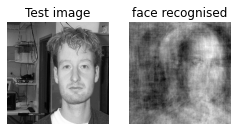

zmean (1, 62500)
uvx (62500, 15)
zmean (1, 62500)
(405, 15)
(15, 1)
Zmean shape (1, 62500)
fc_old (62500,)
fc_new (1, 62500)
[[0.33140618 0.3245615  0.33060701 ... 0.28415311 0.30877856 0.35288148]
 [0.30770423 0.30770584 0.31272996 ... 0.24501634 0.26760889 0.28458198]
 [0.30941566 0.31359635 0.28875465 ... 0.27186935 0.25600187 0.2327682 ]
 ...
 [0.28053228 0.27260763 0.2548574  ... 0.53752533 0.52665866 0.53480455]
 [0.26936178 0.29718568 0.2233214  ... 0.49907382 0.5077915  0.50206605]
 [0.28737244 0.26455988 0.25629072 ... 0.51296213 0.50053735 0.48041832]]


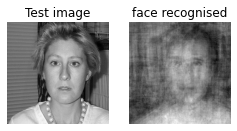

zmean (1, 62500)
uvx (62500, 15)
zmean (1, 62500)
(405, 15)
(15, 1)
Zmean shape (1, 62500)
fc_old (62500,)
fc_new (1, 62500)
[[ 0.04952197  0.07512444  0.05756269 ... -0.18973521 -0.24915045
  -0.16308377]
 [ 0.07366594  0.10068715  0.12302423 ... -0.00736253 -0.19141575
  -0.09414376]
 [-0.03293878  0.06855327  0.09849905 ... -0.05045012 -0.13600461
  -0.03308069]
 ...
 [ 0.12707228  0.21747978  0.17075682 ... -0.44893318 -0.40520975
  -0.47228439]
 [ 0.11609177  0.19757414  0.15983675 ... -0.46004765 -0.42235879
  -0.44840896]
 [ 0.22211267  0.25023786  0.15535392 ... -0.52382511 -0.47418009
  -0.45704074]]


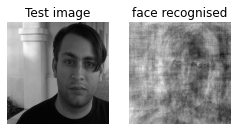

zmean (1, 62500)
uvx (62500, 15)
zmean (1, 62500)
(405, 15)
(15, 1)
Zmean shape (1, 62500)
fc_old (62500,)
fc_new (1, 62500)
[[0.46111151 0.44809141 0.45103383 ... 0.4295519  0.45757663 0.42468533]
 [0.45385291 0.44019804 0.45235304 ... 0.39193969 0.43690359 0.36720176]
 [0.48814879 0.49795623 0.43166721 ... 0.41080797 0.41101527 0.30512569]
 ...
 [0.42859468 0.41801252 0.41862618 ... 0.66001037 0.62916302 0.66541212]
 [0.44758401 0.47565322 0.43491852 ... 0.62220959 0.62501889 0.6302762 ]
 [0.47587419 0.45337961 0.46170792 ... 0.64702599 0.63785716 0.61222393]]


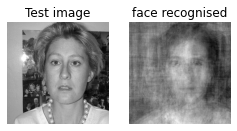

zmean (1, 62500)
uvx (62500, 15)
zmean (1, 62500)
(405, 15)
(15, 1)
Zmean shape (1, 62500)
fc_old (62500,)
fc_new (1, 62500)
[[-0.04965919 -0.01045981 -0.0101431  ... -0.00793617 -0.05493875
  -0.03687919]
 [-0.01601329  0.00459134  0.01188229 ...  0.10565403  0.0067655
   0.02378138]
 [-0.02319293  0.01869977  0.03623992 ...  0.04314162 -0.01217895
   0.01132086]
 ...
 [-0.0447025   0.01837844  0.01829573 ... -0.08250903 -0.08040955
  -0.12841604]
 [-0.06417726 -0.01179025 -0.01485425 ... -0.07826824 -0.06405916
  -0.06400177]
 [-0.02467242  0.01053551 -0.00510747 ... -0.11092855 -0.11329784
  -0.06713334]]


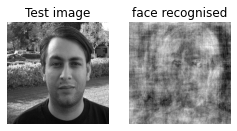

zmean (1, 62500)
uvx (62500, 15)
zmean (1, 62500)
(405, 15)
(15, 1)
Zmean shape (1, 62500)
fc_old (62500,)
fc_new (1, 62500)
[[1.16049243 1.1391399  1.09941698 ... 1.07304441 1.09185593 1.08437501]
 [1.16086845 1.16905097 1.15618527 ... 1.11125567 1.12486162 1.08107413]
 [1.1278126  1.16249486 1.10004059 ... 1.18072594 1.21638231 1.17830323]
 ...
 [0.96095109 0.87267651 0.91267394 ... 0.82267312 0.80679736 0.91353249]
 [1.00873705 0.9493802  0.95437878 ... 0.80922615 0.79492626 0.79249007]
 [1.07354435 1.00143919 0.97783579 ... 0.80728808 0.87417981 0.78085688]]


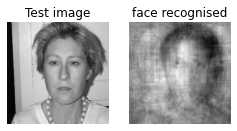

zmean (1, 62500)
uvx (62500, 15)
zmean (1, 62500)
(405, 15)
(15, 1)
Zmean shape (1, 62500)
fc_old (62500,)
fc_new (1, 62500)
[[0.69581215 0.69879877 0.64787389 ... 0.56837884 0.53953618 0.45570774]
 [0.73460371 0.73930184 0.76084804 ... 0.74289356 0.61203421 0.54829754]
 [0.67388237 0.77563623 0.72860321 ... 0.70309259 0.65902964 0.62355056]
 ...
 [0.70398669 0.73404596 0.74937505 ... 0.21305889 0.21440726 0.27130868]
 [0.76654744 0.80121825 0.84767359 ... 0.22586929 0.22868067 0.22653352]
 [0.87521707 0.87799909 0.81389286 ... 0.17570329 0.258497   0.22309995]]


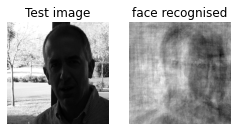

zmean (1, 62500)
uvx (62500, 15)
zmean (1, 62500)
(405, 15)
(15, 1)
Zmean shape (1, 62500)
fc_old (62500,)
fc_new (1, 62500)
[[0.46896609 0.48083325 0.47895247 ... 0.62191738 0.60645996 0.59890526]
 [0.47186327 0.47772571 0.46948373 ... 0.66366631 0.64944908 0.61494764]
 [0.46630888 0.47574514 0.47261352 ... 0.65995236 0.66675142 0.64866862]
 ...
 [0.33075987 0.3146408  0.36529284 ... 0.44717995 0.41835493 0.44276722]
 [0.3415923  0.32892236 0.34373096 ... 0.4612154  0.43260689 0.44192487]
 [0.35914886 0.3512363  0.36928171 ... 0.45273475 0.44101266 0.44456206]]


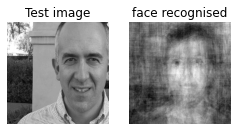

zmean (1, 62500)
uvx (62500, 15)
zmean (1, 62500)
(405, 15)
(15, 1)
Zmean shape (1, 62500)
fc_old (62500,)
fc_new (1, 62500)
[[-0.33828676 -0.28834765 -0.26043681 ... -0.19115427 -0.20426495
  -0.20718061]
 [-0.29633723 -0.27232863 -0.27472515 ... -0.15150694 -0.13810955
  -0.20572256]
 [-0.23958614 -0.22312914 -0.26326524 ... -0.17000936 -0.18795963
  -0.30818386]
 ...
 [-0.29872251 -0.24156137 -0.23122065 ... -0.02828504 -0.07621544
  -0.11882316]
 [-0.32266322 -0.23759419 -0.32414853 ... -0.07937801 -0.07994456
  -0.04701885]
 [-0.27644372 -0.27396778 -0.29258518 ... -0.06656316 -0.12345849
  -0.07035798]]


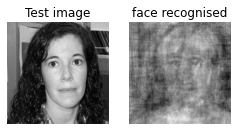

zmean (1, 62500)
uvx (62500, 15)
zmean (1, 62500)
(405, 15)
(15, 1)
Zmean shape (1, 62500)
fc_old (62500,)
fc_new (1, 62500)
[[ 0.1102341   0.10032605  0.11586694 ...  0.03390887  0.06935727
   0.09564977]
 [ 0.07330591  0.06140741  0.08007579 ... -0.02348932  0.00444544
  -0.00595092]
 [ 0.07725104  0.09796051  0.05323532 ... -0.00605744 -0.04323204
  -0.11365687]
 ...
 [ 0.15472006  0.17933054  0.14856624 ...  0.43389009  0.41456678
   0.39547013]
 [ 0.15090706  0.22068266  0.10720309 ...  0.38127647  0.39223844
   0.38208238]
 [ 0.17540093  0.16126783  0.15071053 ...  0.40664569  0.36402363
   0.35756461]]


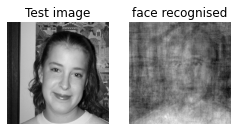

zmean (1, 62500)
uvx (62500, 15)
zmean (1, 62500)
(405, 15)
(15, 1)
Zmean shape (1, 62500)
fc_old (62500,)
fc_new (1, 62500)
[[-0.22957255 -0.20156467 -0.17701518 ... -0.10949636 -0.13963446
  -0.1611971 ]
 [-0.1843069  -0.17621066 -0.1774011  ... -0.03956161 -0.05101934
  -0.13945485]
 [-0.13650759 -0.12266478 -0.17105429 ... -0.08241801 -0.09758625
  -0.23120123]
 ...
 [-0.22929501 -0.15713807 -0.13970157 ...  0.00155366 -0.04803391
  -0.06180243]
 [-0.22952817 -0.14398837 -0.18853959 ... -0.04610751 -0.04003264
  -0.01048652]
 [-0.16408639 -0.16038252 -0.16431101 ... -0.03758381 -0.07409401
  -0.03597514]]


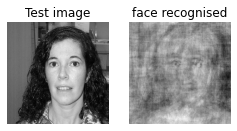

zmean (1, 62500)
uvx (62500, 15)
zmean (1, 62500)
(405, 15)
(15, 1)
Zmean shape (1, 62500)
fc_old (62500,)
fc_new (1, 62500)
[[ 0.2428787   0.25449374  0.28774844 ...  0.43889449  0.40910714
   0.48380935]
 [ 0.22865661  0.24040848  0.23264121 ...  0.37056731  0.37310521
   0.48779463]
 [ 0.24000816  0.18263601  0.26900169 ...  0.35811069  0.3671821
   0.47876964]
 ...
 [ 0.10387897  0.14190693  0.11912973 ...  0.49323419  0.49891432
   0.4526494 ]
 [ 0.0572757   0.05991316  0.09591633 ...  0.51357816  0.50449053
   0.51098162]
 [-0.01313256  0.03619836  0.07445135 ...  0.49914431  0.46182849
   0.52262636]]


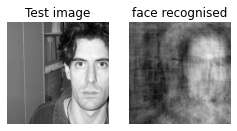

zmean (1, 62500)
uvx (62500, 15)
zmean (1, 62500)
(405, 15)
(15, 1)
Zmean shape (1, 62500)
fc_old (62500,)
fc_new (1, 62500)
[[1.5064253  1.50258745 1.43849426 ... 1.56134225 1.51259806 1.3605918 ]
 [1.57996342 1.58137295 1.58537883 ... 1.68388547 1.61098307 1.51452341]
 [1.59077049 1.62402415 1.59420818 ... 1.66948232 1.71416353 1.70742499]
 ...
 [1.2879521  1.22309749 1.29437594 ... 0.9013658  0.90197887 1.04819872]
 [1.3495998  1.2696157  1.49066781 ... 0.96968286 0.95611016 0.97343082]
 [1.39409335 1.40007855 1.41550794 ... 0.92367752 1.0656374  1.00132731]]


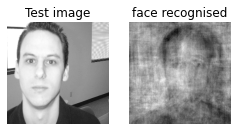

zmean (1, 62500)
uvx (62500, 15)
zmean (1, 62500)
(405, 15)
(15, 1)
Zmean shape (1, 62500)
fc_old (62500,)
fc_new (1, 62500)
[[0.94515029 0.95302909 0.92859662 ... 1.05431648 1.01676441 0.9619388 ]
 [0.98075262 0.99064387 0.9895653  ... 1.10040644 1.05657328 1.05190352]
 [0.98780147 0.98566502 1.0086429  ... 1.08677684 1.11394789 1.1641584 ]
 ...
 [0.7640884  0.73927442 0.76549419 ... 0.6927234  0.6971289  0.75938598]
 [0.77230849 0.72874635 0.86027163 ... 0.74344549 0.72988498 0.74313253]
 [0.76807985 0.79343807 0.80880304 ... 0.70668251 0.77172879 0.76463057]]


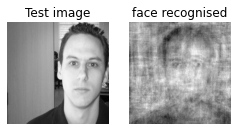

zmean (1, 62500)
uvx (62500, 15)
zmean (1, 62500)
(405, 15)
(15, 1)
Zmean shape (1, 62500)
fc_old (62500,)
fc_new (1, 62500)
[[0.3156207  0.32907106 0.31236329 ... 0.21628219 0.25010191 0.2765736 ]
 [0.28023966 0.29428903 0.3129099  ... 0.24324425 0.20485913 0.22967535]
 [0.21174691 0.29233057 0.2749812  ... 0.24698255 0.19079095 0.19538091]
 ...
 [0.381039   0.39088871 0.3614746  ... 0.28530401 0.27886701 0.24933952]
 [0.39709557 0.43007438 0.31913935 ... 0.27333406 0.25899135 0.24106877]
 [0.42815738 0.41516883 0.34985238 ... 0.25454741 0.2282401  0.23079938]]


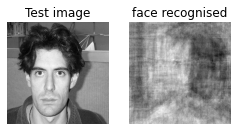

zmean (1, 62500)
uvx (62500, 15)
zmean (1, 62500)
(405, 15)
(15, 1)
Zmean shape (1, 62500)
fc_old (62500,)
fc_new (1, 62500)
[[0.31752749 0.30792211 0.33154418 ... 0.38107956 0.36247292 0.39603828]
 [0.30570292 0.30167492 0.30564899 ... 0.34910553 0.33374345 0.39849433]
 [0.29923587 0.2615029  0.30791624 ... 0.32838812 0.32453392 0.38096225]
 ...
 [0.21935417 0.27025978 0.23140624 ... 0.48221753 0.48449818 0.47843673]
 [0.20053216 0.23551017 0.25694067 ... 0.48585913 0.48288558 0.49441692]
 [0.17913455 0.2165014  0.2220839  ... 0.46828414 0.45392219 0.49180801]]


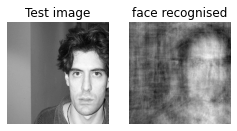

zmean (1, 62500)
uvx (62500, 15)
zmean (1, 62500)
(405, 15)
(15, 1)
Zmean shape (1, 62500)
fc_old (62500,)
fc_new (1, 62500)
[[ 0.1102341   0.10032605  0.11586694 ...  0.03390887  0.06935727
   0.09564977]
 [ 0.07330591  0.06140741  0.08007579 ... -0.02348932  0.00444544
  -0.00595092]
 [ 0.07725104  0.09796051  0.05323532 ... -0.00605744 -0.04323204
  -0.11365687]
 ...
 [ 0.15472006  0.17933054  0.14856624 ...  0.43389009  0.41456678
   0.39547013]
 [ 0.15090706  0.22068266  0.10720309 ...  0.38127647  0.39223844
   0.38208238]
 [ 0.17540093  0.16126783  0.15071053 ...  0.40664569  0.36402363
   0.35756461]]


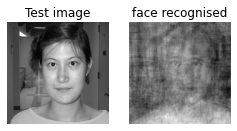

zmean (1, 62500)
uvx (62500, 15)
zmean (1, 62500)
(405, 15)
(15, 1)
Zmean shape (1, 62500)
fc_old (62500,)
fc_new (1, 62500)
[[-0.22445046 -0.21646408 -0.15056326 ... -0.03889313 -0.06377062
   0.09320653]
 [-0.27622594 -0.27280581 -0.27688153 ... -0.1492433  -0.14827609
   0.03683662]
 [-0.28318974 -0.36444473 -0.24050754 ... -0.17391792 -0.20120708
  -0.04334349]
 ...
 [-0.32040182 -0.24408642 -0.3033467  ...  0.29697329  0.31082629
   0.20450414]
 [-0.40538499 -0.35947052 -0.40027653 ...  0.3011272   0.29867983
   0.29690878]
 [-0.49867876 -0.4375516  -0.39652149 ...  0.29549473  0.19896085
   0.29826289]]


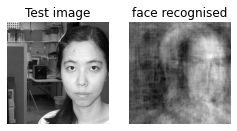

zmean (1, 62500)
uvx (62500, 15)
zmean (1, 62500)
(405, 15)
(15, 1)
Zmean shape (1, 62500)
fc_old (62500,)
fc_new (1, 62500)
[[0.33851713 0.34488417 0.34650043 ... 0.34879433 0.36815483 0.35795627]
 [0.34067608 0.34050631 0.3481713  ... 0.34081834 0.36301052 0.3175118 ]
 [0.36691579 0.38025786 0.3354164  ... 0.35262772 0.34437344 0.26942883]
 ...
 [0.30284458 0.29134543 0.29865717 ... 0.50835334 0.48149953 0.50010943]
 [0.30376336 0.32996756 0.27950646 ... 0.4784245  0.47733377 0.48373732]
 [0.33308699 0.31310675 0.30913256 ... 0.49104231 0.47914128 0.46567855]]


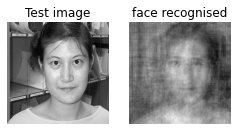

In [14]:
model(15)

In [15]:
def calculate_test_error(k,threshold):
  total_test_image=45
  detect=0
  uvx=np.zeros((size_img**2,k))
  col=0
  for i in range(k-1,-1,-1):
    uvx[:,col]=uv[i].flatten()
    col+=1
  for item in test_image:
    t=item.flatten()
    Zmean_test=t-np.transpose(m)
    wt=np.dot(np.transpose(uvx),np.transpose(Zmean_test))
    wk=buffer[k]
    error=[]
    for wv in wk:
        error.append(np.linalg.norm(wv-wt.T))
    if np.min(error)>threshold:
       detect=detect+1
  perc_error=((total_test_image-detect)/total_test_image)*100
  return perc_error

In [16]:
print(calculate_test_error(15,13))

24.444444444444443


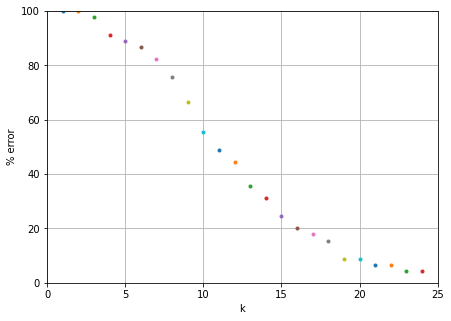

In [18]:
k_list=[]
for i in range(1,25):
  keigen(i)
  k_list.append(i)

graph,axes=plt.subplots(1,1)
graph.set_size_inches(7,5)
for i in k_list:
  y=calculate_test_error(i,13)
  axes.plot(i,y,marker='.')
axes.set(xlabel="k",ylabel="% error",ylim=(0,100),xlim=(0,25))
plt.grid(True)
plt.show()